# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
#metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score, plot_roc_curve,roc_curve,confusion_matrix, plot_confusion_matrix

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv("./drug_consumption.csv",names=["ID", "Age", "Gender", "Education_level", "Country", "Ethinicity", "Nscore", "Escore", "OScore", "AScore", "CScore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])
df.head()

,ID,Age,Gender,Education_level,Country,Ethinicity,Nscore,Escore,OScore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Feature Transformation

In [3]:
df = df.drop(['ID'],axis=1)
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
for cols in drugs:
    df[cols] = [0 if(x == 'CL0') | (x=='CL1') else 1 for x in df[cols]]
df.head()

,Age,Gender,Education_level,Country,Ethinicity,Nscore,Escore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0


# Features and Target Variables

In [4]:
features = ["Age", "Gender", "Education_level", "Country", "Ethinicity", "Nscore", "Escore", "OScore", "AScore", "CScore", "Impulsive", "SS"]
selected_drugs = ["Alcohol", "Choc", "Coke", "LSD", "Nicotine", "VSA"]
X = df[features]
Y = df[selected_drugs]
selected_features = []
for i in range(0,6):
    y = df[selected_drugs[i]]
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
    rfe.fit(X,y)
    selected_features.append(rfe.get_feature_names_out())
    
for i in range(0,6):
    print("For " + selected_drugs[i]+" Selected Features are",end=":") 
    print(selected_features[i])

For Alcohol Selected Features are:['Age' 'Gender' 'Education_level' 'Ethinicity' 'CScore' 'SS']
For Choc Selected Features are:['Age' 'Education_level' 'Country' 'Ethinicity' 'OScore' 'Impulsive']
For Coke Selected Features are:['Age' 'Gender' 'Country' 'Ethinicity' 'CScore' 'SS']
For LSD Selected Features are:['Age' 'Gender' 'Country' 'Ethinicity' 'OScore' 'SS']
For Nicotine Selected Features are:['Age' 'Gender' 'Education_level' 'Country' 'Ethinicity' 'SS']
For VSA Selected Features are:['Age' 'Gender' 'Country' 'Ethinicity' 'CScore' 'SS']


# Splitting Data into Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Initialising each classifiers and its parameters to tune

In [6]:
#Classifiers
classifiers = [DecisionTreeClassifier(), 
               SVC(),
               KNeighborsClassifier(),
               RandomForestClassifier()]
#Parameter Selection for each Classifier
parameters = [{'criterion':('entropy', 'gini'), 'max_depth':[2,4,6,8,10,12]},{'kernel':('linear', 'rbf'), 'C':[1, 10]},
              {'n_neighbors':[5,10,50,60,70,80,90,100,110,120,130,140,150], 'weights':('uniform','distance')},
                {'n_estimators':[100,150,200,250,300,350,380], 'criterion': ('entropy','gini')}]




# A loop in which each model is trained for every target variable, i.e., 6 target variable and 4 models. And for each drug we have one table comparing the results of the model with 4 confusion matrix for each model and a ROC Curve plot comparing the Area under the Curve between models.

Alcohol


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,96.47,96.47,100.00,0.00
1,SVC,96.47,96.47,100.00,0.00
2,KNeighborsClassifier,96.47,96.47,100.00,0.00
3,RandomForestClassifier,96.31,96.61,99.67,4.55


Choc


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,98.72,98.72,100.00,0.0
1,SVC,98.72,98.72,100.00,0.0
2,KNeighborsClassifier,98.72,98.72,100.00,0.0
3,RandomForestClassifier,98.56,98.71,99.84,0.0


Coke


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,63.08,48.59,62.16,63.59
1,SVC,68.22,55.71,52.70,76.81
2,KNeighborsClassifier,66.61,54.32,39.64,81.55
3,RandomForestClassifier,64.04,49.59,54.05,69.58


LSD


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,75.60,59.13,64.74,80.37
1,SVC,76.24,60.00,66.32,80.60
2,KNeighborsClassifier,75.92,59.52,65.79,80.37
3,RandomForestClassifier,75.76,60.43,59.47,82.91


Nicotine


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,69.98,71.14,92.27,25.84
1,SVC,74.64,74.81,93.24,37.80
2,KNeighborsClassifier,72.71,73.92,91.06,36.36
3,RandomForestClassifier,66.93,72.41,81.16,38.76


VSA


,Classifier,Accuracy,Precision,Recall/Sensitivity,Specificity
0,DecisionTreeClassifier,87.00,0.00,0.00,100.0
1,SVC,87.00,0.00,0.00,100.0
2,KNeighborsClassifier,87.00,0.00,0.00,100.0
3,RandomForestClassifier,85.07,38.46,24.69,94.1


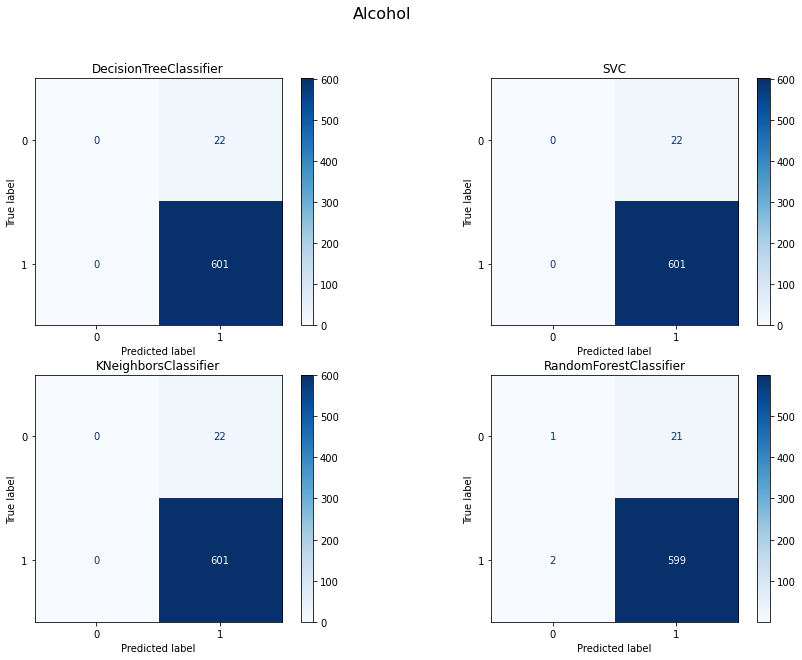

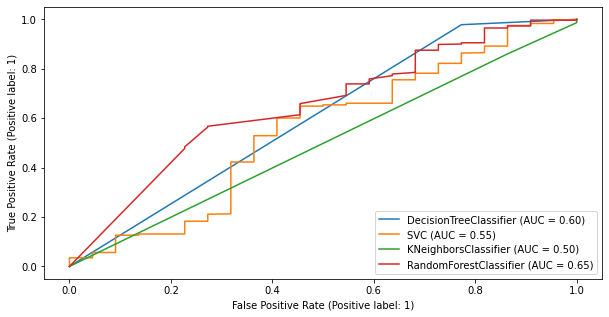

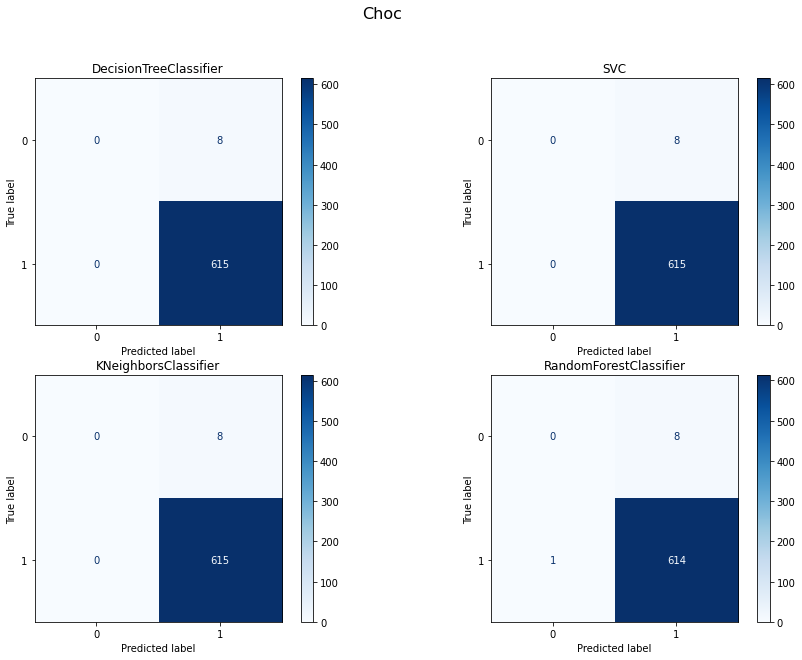

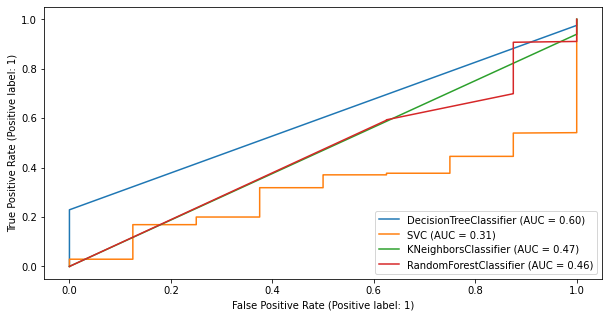

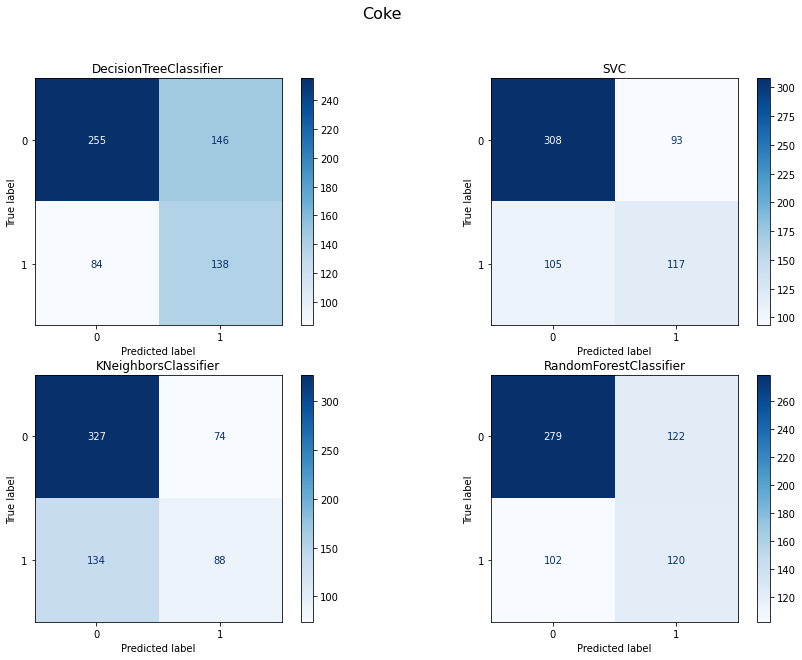

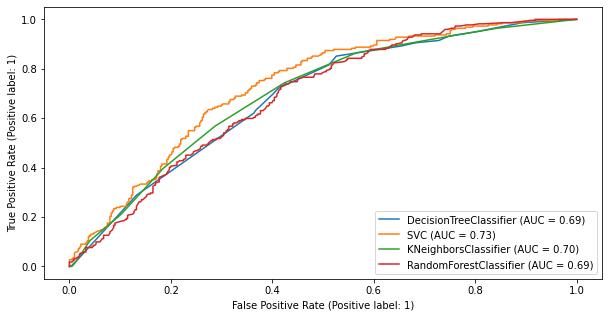

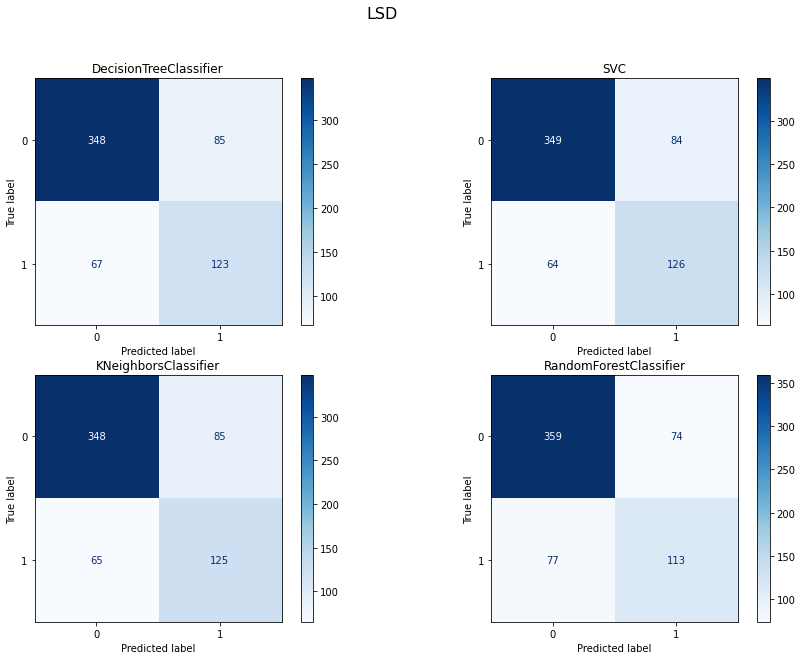

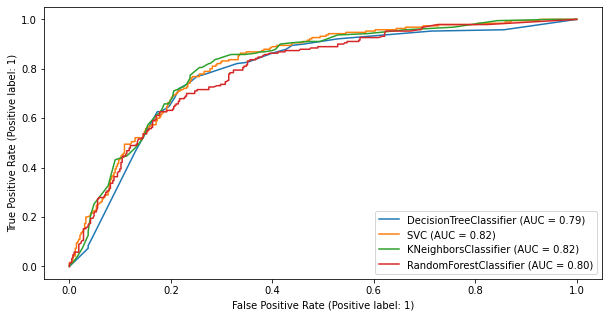

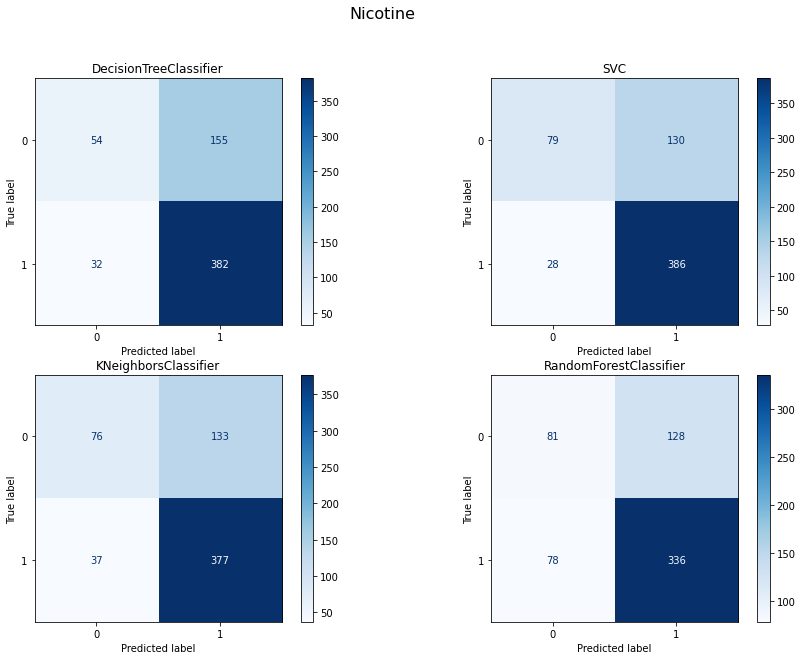

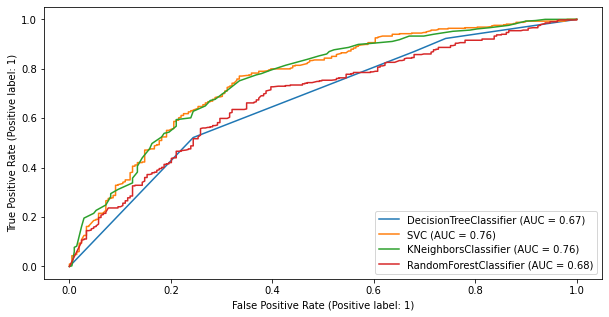

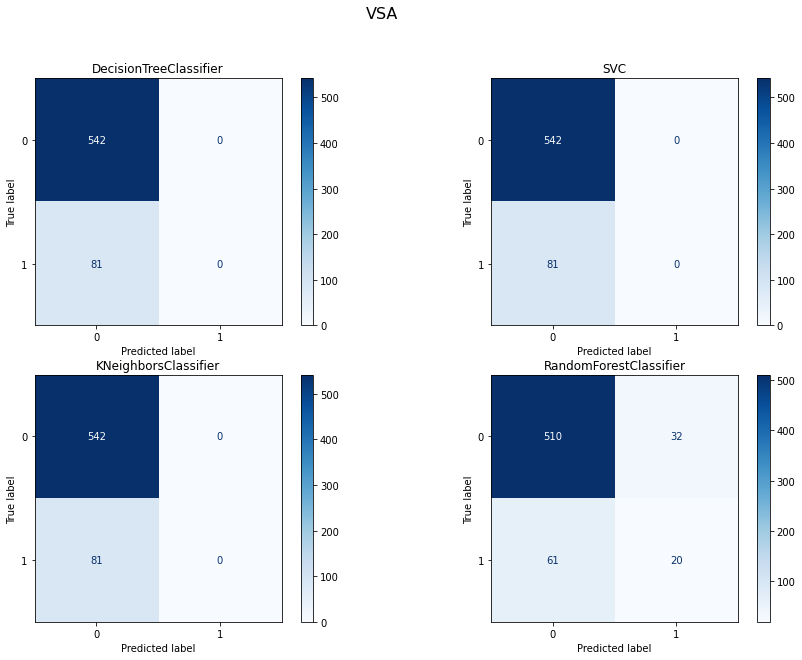

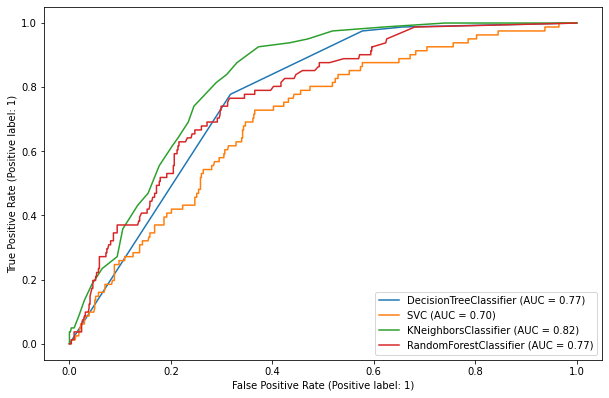

In [7]:
#The outer loop goes on for 6 iteration one for each drug
for j in range(0,6):
    
    #scores[] stores the accuracy,precision, recall for each model
    scores = []
    
    #classifiers_gs stores a model fit by GridSearchCV class with parameters initialised earlier
    classifiers_gs = []
    
    X_train_selected = X_train[selected_features[j]]
    Y_train_selected = y_train[selected_drugs[j]]
    X_test_selected = X_test[selected_features[j]]
    Y_test_selected = y_test[selected_drugs[j]]
    
    # This loop fits each model, so iterates 4 times
    for cls,p,k in zip(classifiers,parameters,range(0,4)):
        classifiers_gs.append(GridSearchCV(cls,p))
        #fit the model on training data
        classifiers_gs[k].fit(X_train_selected, Y_train_selected)
        #the predictions made by the model that we trained
        test_pred = classifiers_gs[k].predict(X_test_selected)
        tn, fp, fn, tp = confusion_matrix(Y_test_selected, test_pred).ravel()
        specificity = tn/(tn+fp)
        # using metrics methods to store accuracy, precision, recall and converting to percentages
        scores.append([accuracy_score(Y_test_selected,test_pred)*100,precision_score(Y_test_selected,test_pred)*100,recall_score(Y_test_selected,test_pred)*100,specificity*100])
         
    #figure and axes for the confusion matrix
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    #figure and axes for the roc_curve
    roc_fig, roc_axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    
    #the table that compares the results of different classifiers
    result_table = pd.DataFrame(columns = ["Classifier", "Accuracy", "Precision", "Recall/Sensitivity","Specificity"])
    
    #this loop is to plot the confusion matrix and roc curve for the particular drug
    for cls, gs, ax, i in zip(classifiers,classifiers_gs, axes.flatten(),range(0,4)):
        #plotting confusion matrix
        plot_confusion_matrix(gs, 
                              X_test_selected, 
                              Y_test_selected, 
                              ax=ax, 
                              cmap='Blues')
        ax.title.set_text(type(cls).__name__)
        #plotting roc_curve
        plot_roc_curve(gs,X_test_selected,Y_test_selected,ax = roc_axes,name=type(cls).__name__)
        #addding values to result tabel
        result_table.loc[len(result_table.index)] = [type(cls).__name__, round(scores[i][0],2), round(scores[i][1],2),round(scores[i][2],2), round(scores[i][3],2)]
    #Heading for confusion matrix and roc curve
    fig.suptitle(selected_drugs[j], fontsize=16)
    #print statements
    print(selected_drugs[j])
    display(result_table)
    
#adjusting subplots
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
  